### Understanding StandardScaler via code 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:\eksauek\Feature Selection\StandardScalar\Social_network.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df = df.drop(columns = ['Gender' , 'User ID'] , axis = 1)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


Before standardiztion perform train_test_split always

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#Splitting x and y 
X = df.drop(columns = 'Purchased' , axis = 1)
y = df['Purchased']

In [6]:
# we have split the data into training and test data
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 ,random_state = 42)

## StandardScaler

In [7]:
#Importing Standard Scaler
from sklearn.preprocessing import StandardScaler

In [8]:
#making an object of it
scaler = StandardScaler()

#now lets fit out data to it
scaler.fit(X_train)

#now lets train in it
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Point to remember , after performing standard scalar ,
its no more in dataframe its in numpy so we have to convert it into dataframe**  
We cannot directly train model by passing numpy.

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#### Lets compare scaled and unscaled versions 

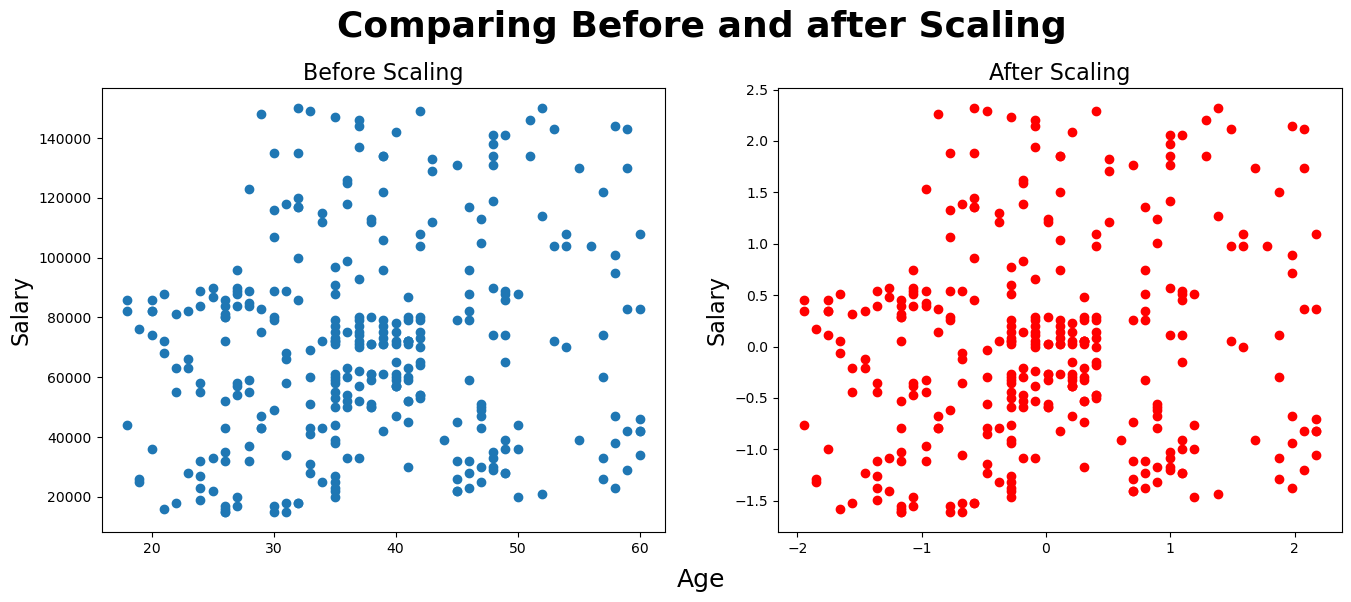

In [47]:
fig , (ax1 , ax2 ) = plt.subplots(ncols = 2 , nrows = 1,figsize = (16,6))

fig.suptitle("Comparing Before and after Scaling",fontweight = 'bold', fontsize = 26)
fig.subplots_adjust(top = 0.85)
fig.supxlabel('Age' , fontsize = 18)

ax1.scatter(X_train['Age'] , X_train['EstimatedSalary']);
ax1.set_title("Before Scaling" , fontsize = 16 , fontweight = 'normal')
ax1.set_ylabel('Salary', fontsize = 16 , fontweight = 'normal')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling" , fontsize = 16 , fontweight = 'normal')
ax2.set_ylabel('Salary', fontsize = 16 , fontweight = 'normal')
plt.show()

#### Now lets see if distribution has changed

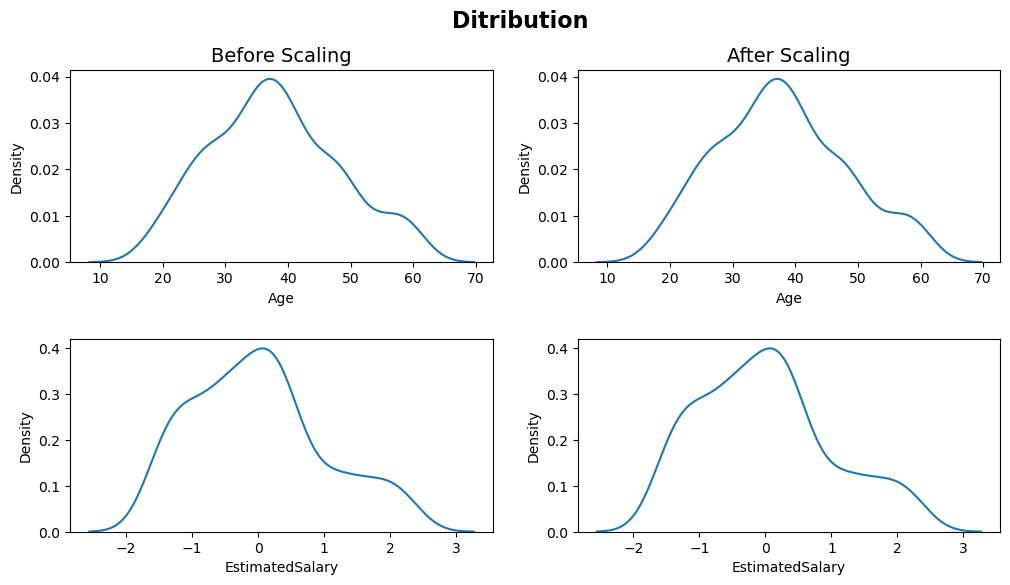

In [75]:
fig , ((ax1,ax2),(ax3 ,ax4)) = plt.subplots(ncols = 2 ,nrows = 2 ,figsize = (12,6))
fig.suptitle('Ditribution',fontweight = 600  , fontsize = 16)

ax1.set_title('Before Scaling' , fontsize = 14)
sns.kdeplot(X_train['Age'], ax = ax1);
sns.kdeplot(X_train['Age'], ax = ax2);

ax2.set_title('After Scaling' , fontsize = 14)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax3);
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax4);

fig.subplots_adjust(hspace=0.4)


### Now lets build a model with scale and without scale

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#model is called as an object
lr = LogisticRegression()
lr_scaled = LogisticRegression()

```python 
Scaling process recap

from sklearn.pre_processing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train) # scaling X_train ,next transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


```

In [85]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

print("Accuracy without scaling", accuracy_score(y_test,y_pred))
print("Accuracy with scaling" , accuracy_score(y_test ,y_pred_scaled))

Accuracy without scaling 0.65
Accuracy with scaling 0.8625
